In [1]:
import sys
sys.path.append('/project2/alvinjin_1630/results')
from Trainer import Trainer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

/project2/alvinjin_1630


/home1/jli99757/.local/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'svc__C': [0.1, 1, 10, 100],
#     'svc__gamma': [0.01, 0.1, 1, 'scale', 'auto'],
#     'svc__kernel': ['rbf', 'poly', 'linear']
# }

In [5]:
# Load dataset
data = Trainer.full_dataset
points = np.array(data[0])   # (x, y) coordinates
labels = np.array(data[1])   # 0 or 1 labels

# Split into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, random_state=42)

# Initialize SVM classifier
# clf = svm.SVC(kernel='poly', C=1.0, gamma='scale')  #can also try 'rbf','linear', 'poly' kernel
clf = make_pipeline(
    StandardScaler(),
    svm.SVC(kernel='rbf', C=100, gamma=10)  #more flexible boundary
)

# Train the model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# predict on new point
# reconstructed_point = ...
# prediction = clf.predict(reconstructed_point)
# print(f"Predicted label for {example_point}: {prediction[0]}")

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1216
         1.0       1.00      1.00      1.00      1977

    accuracy                           1.00      3193
   macro avg       1.00      1.00      1.00      3193
weighted avg       1.00      1.00      1.00      3193



Text(0.5, 1.0, 'Dataset Visualization')

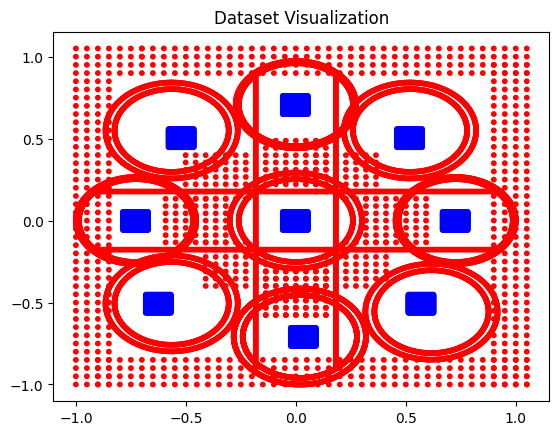

In [6]:
import matplotlib.pyplot as plt

plt.scatter(points[:,0], points[:,1], c=labels, cmap='bwr', s=10)
plt.title("Dataset Visualization")

In [ ]:
# grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid.fit(X_train, y_train)
# print("Best params:", grid.best_params_)
# print("Best cross-val accuracy:", grid.best_score_)

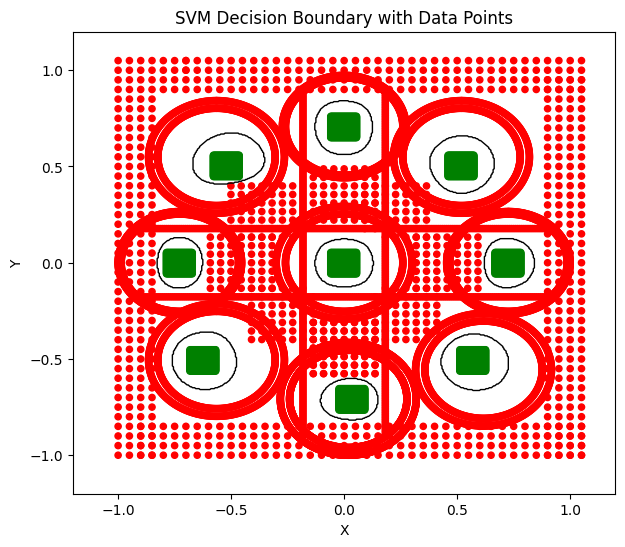

In [22]:
# Create a grid over the data space
x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot original data points
plt.figure(figsize=(7, 6))
plt.scatter(points[:, 0], points[:, 1], 
            c=['green' if l == 0 else 'red' for l in labels], 
            s=20)

# Plot the SVM decision boundary only
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1)

plt.title("SVM Decision Boundary with Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy:", knn.score(X_test, y_test))

# Classify reconstructed points
# reconstructed_point = ...
# prediction = knn.predict(reconstructed_point)
# print(f"Predicted label for {example_point}: {prediction[0]}")

Accuracy: 1.0


In [ ]:
def svm_label_accuracy(true_label, points):
    points = np.array(points)
    preds = clf.predict(points) # Predict labels using the trained SVM model
    correct = np.sum(preds == true_label) # Count matches
    percent_correct = (correct / len(points)) * 100
    return percent_correct

In [ ]:
def knn_label_accuracy(true_label, points):
    points = np.array(points)
    preds = knn.predict(points)
    correct = np.sum(preds == true_label)
    percent_correct = (correct / len(points)) * 100
    return percent_correct